In [3]:
## PART III

In [4]:
# Import dependencies 
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import datetime as dt
import pandas as pd
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
from sqlalchemy import Column, Integer, String, Float, Text, ForeignKey
import numpy as np

In [6]:
# Create Engine
engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurements', 'station']

In [7]:
engine.execute('SELECT * FROM measurements LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-07', 0.06, 70),
 (6, 'USC00519397', '2010-01-08', 0.0, 64),
 (7, 'USC00519397', '2010-01-09', 0.0, 68),
 (8, 'USC00519397', '2010-01-10', 0.0, 73),
 (9, 'USC00519397', '2010-01-11', 0.01, 64),
 (10, 'USC00519397', '2010-01-12', 0.0, 61)]

In [8]:
# Reflect Database into ORM class
Station = Base.classes.station
Measurements = Base.classes.measurements

In [9]:
# Start a session to query the database
session = Session(engine)

In [10]:
engine.execute('SELECT max(date) FROM measurements').fetchall()

[('2017-08-23',)]

In [15]:
last_year_dt = dt.date(2017, 8, 23) - dt.timedelta(days=365)
last_year_dt

datetime.date(2016, 8, 23)

In [40]:
measurement_since_last_year = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date > last_year_dt).\
    order_by(Measurements.date).all()
prcp_df = pd.DataFrame(measurement_since_last_year)
prcp_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,1.22
4,2016-08-24,2.15


In [42]:
prcp_df.set_index('date').head(5)


,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15


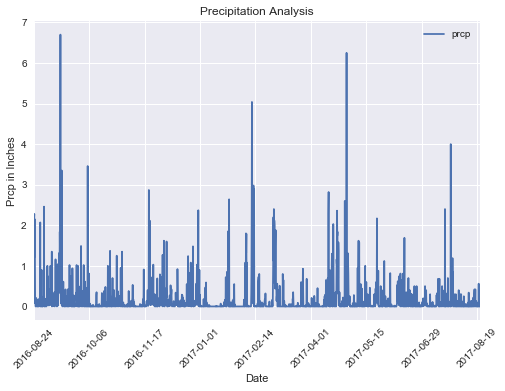

In [43]:
# plot the dataframe
prcp_df.plot('date', 'prcp')
plt.title("Precipitation Analysis")
plt.xlabel("Date")
plt.ylabel("Prcp in Inches")
plt.xticks(rotation=45)
plt.show()

In [46]:
# Total number of station
session.query(Measurements).group_by(Measurements.station).count()

9

In [55]:
# List the stations and observation counts in descending order
busy_station = engine.execute('SELECT station, count(*) FROM measurements group by station order by count(*) desc').fetchall()
print(busy_station)

[('USC00519281', 2772), ('USC00513117', 2696), ('USC00519397', 2685), ('USC00519523', 2572), ('USC00516128', 2484), ('USC00514830', 1937), ('USC00511918', 1932), ('USC00517948', 683), ('USC00518838', 342)]


In [52]:
# Which station has the highest number of observations?
engine.execute('SELECT station, count(*) FROM measurements group by station order by count(*) desc LIMIT 1').fetchall()

[('USC00519281', 2772)]

In [57]:
busiest = busy_station[0][0]
busiest

'USC00519281'

In [62]:
# query to pull the last year of precipitation data for the busiest station
temperature = session.query(Measurements.station, Measurements.date, Measurements.tobs).\
    filter(Measurements.station == busiest).\
    filter(Measurements.date > last_year_dt).\
    order_by(Measurements.date).all()
temperature

[('USC00519281', '2016-08-24', 77),
 ('USC00519281', '2016-08-25', 80),
 ('USC00519281', '2016-08-26', 80),
 ('USC00519281', '2016-08-27', 75),
 ('USC00519281', '2016-08-28', 73),
 ('USC00519281', '2016-08-29', 78),
 ('USC00519281', '2016-08-30', 77),
 ('USC00519281', '2016-08-31', 78),
 ('USC00519281', '2016-09-01', 80),
 ('USC00519281', '2016-09-02', 80),
 ('USC00519281', '2016-09-03', 78),
 ('USC00519281', '2016-09-04', 78),
 ('USC00519281', '2016-09-05', 78),
 ('USC00519281', '2016-09-06', 73),
 ('USC00519281', '2016-09-07', 74),
 ('USC00519281', '2016-09-08', 80),
 ('USC00519281', '2016-09-09', 79),
 ('USC00519281', '2016-09-10', 77),
 ('USC00519281', '2016-09-11', 80),
 ('USC00519281', '2016-09-12', 76),
 ('USC00519281', '2016-09-13', 79),
 ('USC00519281', '2016-09-14', 75),
 ('USC00519281', '2016-09-15', 79),
 ('USC00519281', '2016-09-16', 78),
 ('USC00519281', '2016-09-17', 79),
 ('USC00519281', '2016-09-18', 78),
 ('USC00519281', '2016-09-19', 78),
 ('USC00519281', '2016-09-20

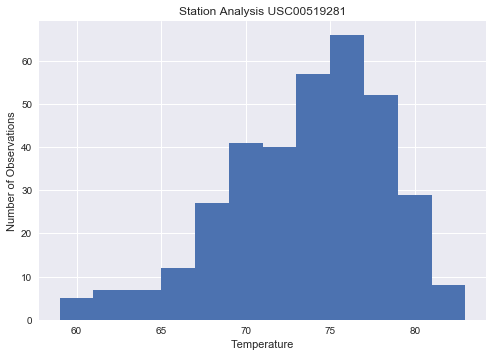

In [63]:
# plot the temperature data in a histogram with 12 bins
temp_df=pd.DataFrame(temperature)
plt.hist(temp_df['tobs'],12)
plt.xlabel("Temperature")
plt.ylabel("Number of Observations")
plt.title("Station Analysis " + busiest)
plt.show()

In [69]:
# Temperature Analysis

In [77]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).\
        filter(Measurements.date >= start_date).filter(Measurements.date <= end_date).all()
    
    
temp_range = (calc_temps('2017-01-01', '2017-01-22'))
print(temp_range)

[(60, 69.43697478991596, 80)]


In [87]:
# calculate the min/max/avg from last year that matches my trip date
arrive = dt.date(2018, 1, 1)
leave = dt.date(2018, 1, 22)
last_year = dt.timedelta(days=365)
temp_range_last_year = (calc_temps((arrive-last_year), (leave-last_year)))
print(temp_range_last_year)

[(60, 69.43697478991596, 80)]


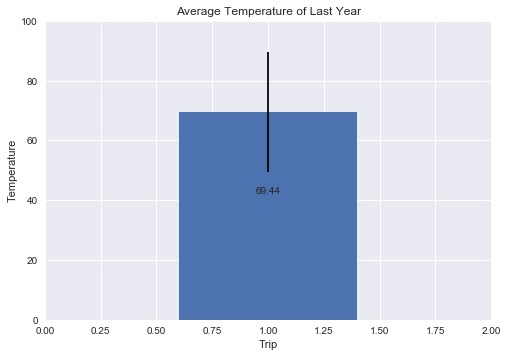

In [88]:
# plot the calculated min/max/avg from last year for the trip dates as a bar chart

peak_to_peak = temp_range_last_year[0][2]-temp_range_last_year[0][0]
avg_temp = temp_range_last_year[0][1]
min_temp = temp_range_last_year[0][0]
max_temp = temp_range_last_year[0][2]

fig, ax = plt.subplots()
bar_chart = ax.bar(1 , avg_temp, yerr=peak_to_peak)
ax.set_xlabel("Trip")
ax.set_ylabel("Temperature")
ax.set_title("Average Temperature of Last Year")

def autolabels(rects):
    for rect in rects:
        h=rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., .6*h,'%.2f' % float(h) ,ha='center', va='bottom', fontsize=10)

        
    # label the bars 
autolabels(bar_chart)        
plt.ylim(0, 100)
plt.xlim(0,2)
plt.show()